# Melbourne Housing Prediction : Linear Regression

https://www.kaggle.com/datasets/anthonypino/melbourne-housing-marketm

## About Data and its Problem

##### Well it finally happened, Melbourne housing has cooled off. So here's your challenge;  

1) when did it exactly happen? , 

2) Could you see it slowing down? What were the variables that showed the slowing down (was it overall price, amount sold vs unsold, change in more rentals sold and less housing, changes in which CouncilArea or Region, more houses sold in distances further away from Melbourne CBD and less closer)? 

3) Could you have predicted it (I'm not sure how you would do this, but I'm sure you magicians have a way that would make me think we should burn you for being a witch) 

4) Should I hold off even longer in buying a two bedroom apartment in Northcote? 

###### Importing Libraries

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import r2_score,accuracy_score
import warnings
warnings.filterwarnings('ignore')

###### Import Data

In [176]:
df_house = pd.read_csv('Melbourne_housing_FULL.csv')
df = df_house.copy()
df.head(6)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0


###### Exploratiry Data Analysis

In [177]:
df.shape

(34857, 21)

In [178]:
df.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [179]:
df.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

###### Handling Object/Categorical Features

###### Checking Various Items Counts in each columns

In [180]:
df_unique = pd.DataFrame(df.nunique())
df_unique.columns =['count_item']
df_unique_top_ten = df_unique.sort_values('count_item' , ascending = True).head(10)
df_unique_top_ten

,count_item
Type,3
Regionname,8
Method,9
Bathroom,11
Rooms,12
Bedroom2,15
Car,15
CouncilArea,33
Date,78
YearBuilt,160


In [181]:
col_list = list(df_unique_top_ten.index.values)
col_list
for col in col_list:    
    df_value_count = pd.DataFrame(df[col].value_counts())
    print(df_value_count)    
    print('\n')  

    Type
h  23980
u   7297
t   3580


                            Regionname
Southern Metropolitan            11836
Northern Metropolitan             9557
Western Metropolitan              6799
Eastern Metropolitan              4377
South-Eastern Metropolitan        1739
Eastern Victoria                   228
Northern Victoria                  203
Western Victoria                   115


    Method
S    19744
SP    5095
PI    4850
VB    3108
SN    1317
PN     308
SA     226
W      173
SS      36


      Bathroom
1.0      12969
2.0      11064
3.0       2181
4.0        269
5.0         77
0.0         46
6.0         16
7.0          4
8.0          3
12.0         1
9.0          1


    Rooms
3   15084
2    8332
4    7956
5    1737
1    1479
6     204
7      32
8      19
10      6
9       4
12      3
16      1


      Bedroom2
3.0      11881
4.0       6348
2.0       5777
5.0       1427
1.0        966
6.0        168
7.0         30
0.0         17
8.0         13
9.0          5
10.0         4
30.

In [182]:
df[['Suburb', 'Postcode']].tail(40)

,Suburb,Postcode
34817,Watsonia,3087.0
34818,Watsonia North,3087.0
34819,Watsonia North,3087.0
34820,Werribee,3030.0
34821,Werribee,3030.0
34822,Werribee,3030.0
34823,Werribee,3030.0
34824,Werribee,3030.0
34825,Werribee South,3030.0
34826,West Footscray,3012.0


###### Conclusion 

Columns like : ['Bedroom2' , 'Rooms', 'Bathroom', 'Car'] are with very less counf - if the items value is more than 8

###### Conclusion 
We can see the Blank/Null Vaues are very high for two columns : BuildingArea, YearBuilt. Hence, we can drop them

BuildingArea     21115

YearBuilt        19306

Address Feature having 34009 unique values ....Out of total 34857 records, hence we should remove that entire column

Columns like : ['Bedroom2' , 'Rooms', 'Bathroom'] are almost same value and making redundancy, hence we can drop any one of them
    'Bedroom'

Postcode is very similar to the Suburb feature

### Data Cleaning Steps

In [183]:
# Drop date column
print('Shape before drop features ' , df.shape)
df.drop(['YearBuilt', 'BuildingArea', 'Address', 'Postcode', 'Bedroom2'], axis = 1, inplace = True)
print('Shape after drop features ' , df.shape)


Shape before drop features  (34857, 21)
Shape after drop features  (34857, 16)


In [184]:
# Below are Quasi Constant Feature, hence we drop these rows
print('Bathroom with more than 8 number are : ', df[df['Bathroom'] >= 8].shape[0])
print('Rooms with more than 8 number are : ', df[df['Rooms'] >= 8].shape[0])
print('Car with more than 8 number are : ', df[df['Car']>=8].shape[0])

Bathroom with more than 8 number are :  5
Rooms with more than 8 number are :  33
Car with more than 8 number are :  37


In [185]:
# Data to be drop off
df_to_be_drop_Bathroom = df[df['Bathroom'] >= 8].index.to_list()
df_to_be_drop_Room = df[df['Rooms'] >= 8].index.to_list()
df_to_be_drop_Car  =df[df['Car']>=8].index.to_list()

In [186]:
drop_index = []
#type(drop_index)
#drop_index.extend(df_to_be_drop_Bathroom)

for item in df_to_be_drop_Bathroom:
    drop_index.append(item)
print(len(drop_index))
for item in df_to_be_drop_Room:
    drop_index.append(item)
print(len(drop_index))
for item in df_to_be_drop_Car:
    drop_index.append(item)
print(len(drop_index))
drop_index = set(drop_index)
type(drop_index)

5
38
75


set

In [187]:
# Collating all Index in a new List
drop_list = [drop_index]
drop_list= [   ]
for item in drop_index:
    drop_list.append(item)
drop_list 

[6017,
 32002,
 25603,
 16133,
 23941,
 29701,
 25096,
 33157,
 18443,
 1932,
 27150,
 30990,
 30482,
 5398,
 13335,
 28694,
 4891,
 7451,
 7454,
 12959,
 5409,
 29090,
 805,
 7590,
 22572,
 10157,
 7598,
 16173,
 15920,
 22316,
 30382,
 19892,
 2613,
 23093,
 8251,
 14651,
 6589,
 17472,
 21569,
 12357,
 12742,
 12743,
 24262,
 16712,
 24518,
 20046,
 29910,
 3288,
 15449,
 24794,
 7134,
 32862,
 5985,
 26210,
 23395,
 4324,
 2536,
 616,
 1640,
 22888,
 26600,
 18923,
 19438,
 7535,
 25839,
 27882,
 25717,
 8309,
 20855,
 31864,
 30585]

In [188]:
# Dropping Above condition rows
print('Shape before drop ' , df.shape)
#df.drop(index = drop_index, inplace = True)
df.drop(drop_list, axis=0, inplace=True)
print('Shape after drop ' , df.shape)

Shape before drop  (34857, 16)
Shape after drop  (34786, 16)


###### After first layer of dropping features and records, below is the dataframe

In [189]:
print('After dropping additional features ' , df.shape)
df.head(2)

After dropping additional features  (34786, 16)


,Suburb,Rooms,Type,Price,Method,SellerG,Date,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,2,h,NaN,SS,Jellis,3/09/2016,2.5,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,2,h,1480000.0,S,Biggin,3/12/2016,2.5,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0


In [190]:
# As we are working on Linear Regression Project, hence we will delete date feature and add two more feature of Year and Month
df['Date'].head(2)
df['Date'] = pd.to_datetime(df['Date'],dayfirst= True )

# Create Year and Month features
df['year_sold'] = df['Date'].dt.year
df['month_sold'] = df['Date'].dt.month
###
# Remove Date as we will not need it anymore
df = df.drop(columns=["Date"]) 

In [191]:
df.head(2)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,year_sold,month_sold
0,Abbotsford,2,h,NaN,SS,Jellis,2.5,1.0,1.0,126.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016,9
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,1.0,202.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016,12


In [192]:
# Drop Records if ALL Threshold is 3
print('Shape of DataFrame before Drop : ' , df.shape)
new_df = df.dropna(thresh =3,axis = 1)
print('Shape of DataFrame after Drop : ' , new_df.shape)

Shape of DataFrame before Drop :  (34786, 17)
Shape of DataFrame after Drop :  (34786, 17)


In [193]:
# Unique items in each feature
df.nunique()

Suburb             350
Rooms                7
Type                 3
Price             2869
Method               9
SellerG            387
Distance           215
Bathroom             8
Car                  8
Landsize          1677
CouncilArea         33
Lattitude        13377
Longtitude       14490
Regionname           8
Propertycount      341
year_sold            3
month_sold          12
dtype: int64

In [194]:
# With above code we can see there are 13000 + unique records in Longtitude and Lattitude feature, 
print('Before Dropping off column Lattitude , Longtitude : ' , df.shape)
df.drop(['Lattitude', 'Longtitude'] , axis = 1, inplace = True)
print('After Dropping off column Lattitude , Longtitude : ' , df.shape)

Before Dropping off column Lattitude , Longtitude :  (34786, 17)
After Dropping off column Lattitude , Longtitude :  (34786, 15)


In [195]:
# Catagorical columns
cat_col = df.select_dtypes(include = 'object')
for cat_columns in cat_col:
    print('Feature ' , cat_columns , " Unique Items are  : ", df[cat_columns].unique())
    print('\n')

Feature  Suburb  Unique Items are  :  ['Abbotsford' 'Airport West' 'Albert Park' 'Alphington' 'Altona'
 'Altona North' 'Armadale' 'Ascot Vale' 'Ashburton' 'Ashwood'
 'Avondale Heights' 'Balaclava' 'Balwyn' 'Balwyn North' 'Bentleigh'
 'Bentleigh East' 'Box Hill' 'Braybrook' 'Brighton' 'Brighton East'
 'Brunswick' 'Brunswick West' 'Bulleen' 'Burwood' 'Camberwell'
 'Canterbury' 'Carlton North' 'Carnegie' 'Caulfield' 'Caulfield North'
 'Caulfield South' 'Chadstone' 'Clifton Hill' 'Coburg' 'Coburg North'
 'Collingwood' 'Doncaster' 'Eaglemont' 'Elsternwick' 'Elwood' 'Essendon'
 'Essendon North' 'Fairfield' 'Fitzroy' 'Fitzroy North' 'Flemington'
 'Footscray' 'Glen Iris' 'Glenroy' 'Gowanbrae' 'Hadfield' 'Hampton'
 'Hampton East' 'Hawthorn' 'Heidelberg Heights' 'Heidelberg West'
 'Hughesdale' 'Ivanhoe' 'Kealba' 'Keilor East' 'Kensington' 'Kew'
 'Kew East' 'Kooyong' 'Maidstone' 'Malvern' 'Malvern East' 'Maribyrnong'
 'Melbourne' 'Middle Park' 'Mont Albert' 'Moonee Ponds' 'Moorabbin'
 'Newport' '

In [196]:
# Catagorical columns -- Null VAlues
cat_col.isnull().sum()

Suburb         0
Type           0
Method         0
SellerG        0
CouncilArea    3
Regionname     3
dtype: int64

In [197]:
df.CouncilArea.mode()

0    Boroondara City Council
Name: CouncilArea, dtype: object

In [198]:
df['Regionname'].mode()[0]
df['CouncilArea'].mode()

0    Boroondara City Council
Name: CouncilArea, dtype: object

In [199]:
# Filling null values of categorical columns only
df['CouncilArea'].fillna(df['CouncilArea'].mode()[0], inplace=True)
df['Regionname'].fillna(df['Regionname'].mode()[0], inplace=True)

In [200]:
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             7589
Method               0
SellerG              0
Distance             1
Bathroom          8216
Car               8716
Landsize         11788
CouncilArea          0
Regionname           0
Propertycount        3
year_sold            0
month_sold           0
dtype: int64

In [201]:
print('Before Dropping records  shape : ', df.shape)
df.dropna(subset=['Price', 'Bathroom', 'Car', 'Landsize'], how='all', inplace=True)
print('After Dropping records  shape : ', df.shape)

Before Dropping records  shape :  (34786, 15)
After Dropping records  shape :  (33013, 15)


###### Check on categorical columns

In [202]:
df.dtypes
df.describe(include='object').T

,count,unique,top,freq
Suburb,33013,349,Reservoir,801
Type,33013,3,h,23098
Method,33013,9,S,19246
SellerG,33013,381,Jellis,3162
CouncilArea,33013,33,Boroondara City Council,3401
Regionname,33013,8,Southern Metropolitan,11010


###### Check on Non-Categorical columns6

In [203]:
df.describe(include=['int64','float64']).T

,count,mean,std,min,25%,50%,75%,max
Rooms,33013.0,3.029928e+00,0.949188,1.0,2.0,3.0,4.0,7.0
Price,27197.0,1.049145e+06,640088.247123,85000.0,635000.0,870000.0,1292000.0,11200000.0
Distance,33012.0,1.121127e+01,6.791783,0.0,6.4,10.3,14.0,48.1
Bathroom,26570.0,1.621340e+00,0.713487,0.0,1.0,2.0,2.0,7.0
Car,26070.0,1.716686e+00,0.959365,0.0,1.0,2.0,2.0,7.0
Landsize,22998.0,5.889003e+02,3384.184050,0.0,224.0,520.0,669.0,433014.0
Propertycount,33010.0,7.563359e+03,4425.427685,83.0,4385.0,6763.0,10331.0,21650.0
year_sold,33013.0,2.016837e+03,0.636018,2016.0,2016.0,2017.0,2017.0,2018.0
month_sold,33013.0,7.139278e+00,3.144861,1.0,5.0,7.0,10.0,12.0


Above description shows the null values in Bathroom, Car Landsize , etc columns

In [204]:
# Checking Null Values again
df.isnull().sum()

Suburb               0
Rooms                0
Type                 0
Price             5816
Method               0
SellerG              0
Distance             1
Bathroom          6443
Car               6943
Landsize         10015
CouncilArea          0
Regionname           0
Propertycount        3
year_sold            0
month_sold           0
dtype: int64

In [205]:
# dropping all records with missing values
print('Shape of the df before : ', df.shape)
df = df.dropna()
print('Shape of the df after : ', df.shape)

Shape of the df before :  (33013, 15)
Shape of the df after :  (17667, 15)


In [206]:
# Checking Null Values again
df.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Distance         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Regionname       0
Propertycount    0
year_sold        0
month_sold       0
dtype: int64

## Data Visualization

Text(0, 0.5, 'Price')

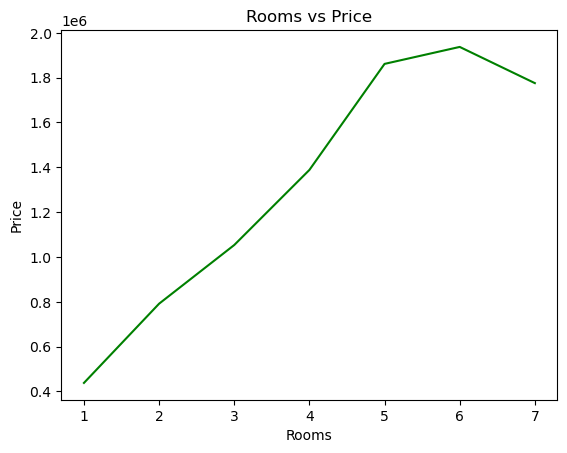

In [207]:
# Now we have dropped all missing value records,hence data visualization can start
x=df.groupby('Rooms').mean()['Price']
y=x.plot(color='green')
y.set_title('Rooms vs Price')
y.set_xlabel('Rooms')
y.set_ylabel('Price')

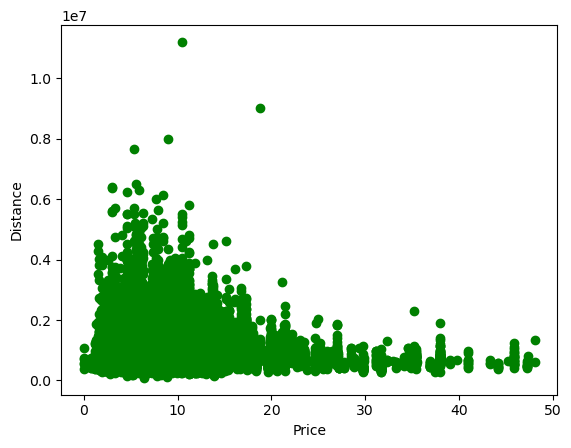

In [208]:

plt.scatter(df['Distance'],df['Price'],color='green')
#plt.title("Sports Watch Data")
plt.xlabel("Price")
plt.ylabel("Distance")


plt.show()

### Checking Outlier

<AxesSubplot:xlabel='Distance', ylabel='Density'>

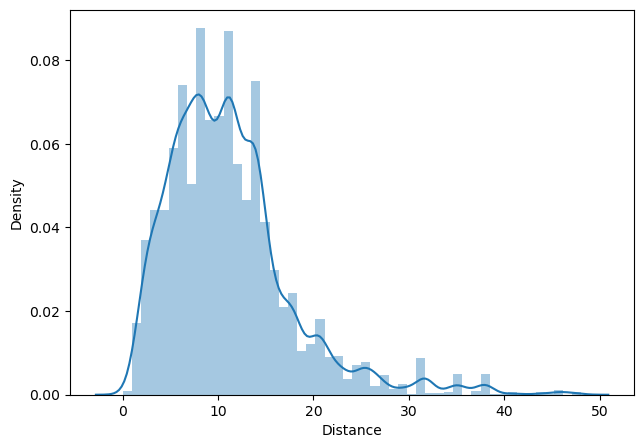

In [209]:
# With above boxplot we found outlier columns ['Distance','Bothroom','Car', 'landsize', 'lattitude','longtitude','property']
col = ['Distance','Bathroom','Car', 'Landsize', 'lattitude','longtitude','property']
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['Distance'])

<AxesSubplot:xlabel='Bathroom', ylabel='Density'>

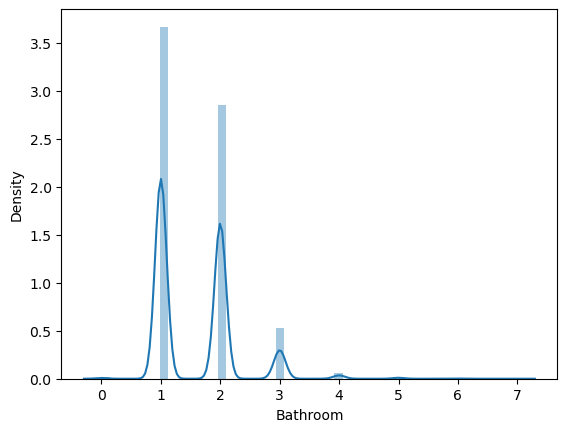

In [210]:
sns.distplot(df['Bathroom'])

<AxesSubplot:xlabel='Car', ylabel='Density'>

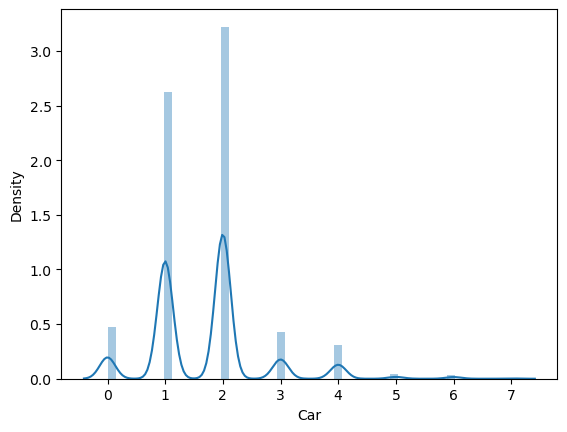

In [211]:
sns.distplot(df['Car'])

<AxesSubplot:xlabel='Landsize', ylabel='Density'>

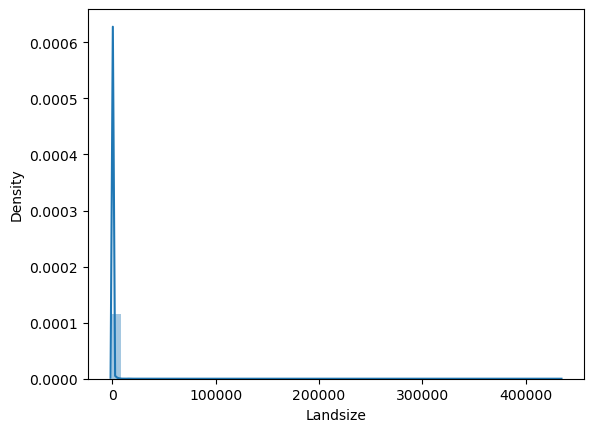

In [212]:
sns.distplot(df['Landsize'])

In [213]:
df.head(5)

,Suburb,Rooms,Type,Price,Method,SellerG,Distance,Bathroom,Car,Landsize,CouncilArea,Regionname,Propertycount,year_sold,month_sold
1,Abbotsford,2,h,1480000.0,S,Biggin,2.5,1.0,1.0,202.0,Yarra City Council,Northern Metropolitan,4019.0,2016,12
2,Abbotsford,2,h,1035000.0,S,Biggin,2.5,1.0,0.0,156.0,Yarra City Council,Northern Metropolitan,4019.0,2016,2
4,Abbotsford,3,h,1465000.0,SP,Biggin,2.5,2.0,0.0,134.0,Yarra City Council,Northern Metropolitan,4019.0,2017,3
5,Abbotsford,3,h,850000.0,PI,Biggin,2.5,2.0,1.0,94.0,Yarra City Council,Northern Metropolitan,4019.0,2017,3
6,Abbotsford,4,h,1600000.0,VB,Nelson,2.5,1.0,2.0,120.0,Yarra City Council,Northern Metropolitan,4019.0,2016,6


In [214]:
df.describe(include='object').T

,count,unique,top,freq
Suburb,17667,333,Reservoir,430
Type,17667,3,h,13318
Method,17667,5,S,11545
SellerG,17667,309,Nelson,1883
CouncilArea,17667,33,Boroondara City Council,1678
Regionname,17667,8,Southern Metropolitan,5523


###### Data Transformation wth Label Encoder - Features only with maximum items

In [215]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['Suburb'] = labelencoder.fit_transform(df['Suburb'])
df['SellerG']=labelencoder.fit_transform(df['SellerG'])
df['CouncilArea']=labelencoder.fit_transform(df['CouncilArea'])

In [216]:
df.shape

(17667, 15)

###### Data Transformation with OneHotEncoder - Features with lesser items (Using Pandas)

In [217]:
df = pd.get_dummies(df, columns = ['Type', 'Method', 'Regionname'])
df.shape

(17667, 28)

###### Begin Linear Regression Model

In [218]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score
from sklearn.model_selection import train_test_split

In [219]:
# Exporting dataset - After Clearning and Feature Reduction MVP

In [220]:
df.to_excel("melbourne dataset after clearning.xlsx")

In [221]:
X = df.drop('Price', axis = 1)
y = df['Price']

In [222]:
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0)

In [223]:
model = LinearRegression()
model.fit(X_Train, y_train)
y_predicted = model.predict(X_Test)

In [224]:
r2_Score = r2_score(y_test,y_predicted)
r2_Score

0.6097433816724918

In [225]:
print(X_Test.shape)
print(y_test.shape)
print(len(y_predicted))

(3534, 27)
(3534,)
3534


In [226]:
y_pred_df = pd.DataFrame(y_predicted , columns = ['Predicted'])
accuracy_check_df = pd.concat([X_Test, y_test], axis = 1)
accuracy_check_df.head(2)

,Suburb,Rooms,SellerG,Distance,Bathroom,Car,Landsize,CouncilArea,Propertycount,year_sold,...,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria,Price
26703,296,3,52,7.0,2.0,2.0,482.0,6,8870.0,2017,...,1,0,0,1,0,0,0,0,0,810000.0
23605,47,2,227,5.2,1.0,1.0,183.0,24,11918.0,2017,...,0,0,0,1,0,0,0,0,0,790000.0


In [227]:
y_predicted
arr_pred = np.round(y_predicted,decimals = 2)
arr_pred_df = pd.DataFrame(arr_pred)
arr_pred_df.columns = ['Predicted']
arr_pred_df.head()

,Predicted
0,950018.14
1,972014.15
2,1907769.04
3,507279.39
4,1055535.38


In [228]:
writer = pd.ExcelWriter('After First Model.xlsx', engine = 'xlsxwriter')
df.to_excel(writer, sheet_name = 'Main DF')
accuracy_check_df.to_excel(writer, sheet_name = 'Test Dataset')
arr_pred_df.to_excel(writer, sheet_name = 'Predicted  Values')
writer.save()
writer.close()

###### R2 Score approx 58% with MVP

In [229]:
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score , max_error

In [230]:
r2_score_ =r2_score(y_test,arr_pred_df)
r2_score_

0.6097433816565877

In [231]:
MAE  = mean_absolute_error(y_test, y_predicted)
print('Mean Absolute Error : ', MAE)

Mean Absolute Error :  281967.0985238671


In [232]:
MSE  = mean_squared_error(y_test, y_predicted)
print('Mean Square Error : ', MAE)

Mean Square Error :  281967.0985238671


In [233]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
#df1= scaler.fit(X_Train)
scaled_data = scaler.fit_transform(X)
scaled_data
X_Train, X_Test, y_train, y_test = train_test_split(scaled_data,y,test_size=.2, random_state=0)


In [234]:
# Accuracy After Scaling the data - 
model.fit(X_Train, y_train)
y_predicted = model.predict(X_Test)
r2_Score = r2_score(y_test,y_predicted)
r2_Score

0.609713815949028

###### Feature Selection Process Begins

###### Variance Threshold Method

In [235]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold = 0.05)   # There is long discussion/calculation required to give threshold number , generally we give value from .1 to .01. so we use 0.05. Before that your dataset should be standardize/normalize

In [236]:
# fit the X_Train Columns
sel.fit(X_Train)

VarianceThreshold(threshold=0.05)

In [237]:
sel.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True])

In [238]:
# No Columns can be drop
sel.get_support().sum()

27

###### Checking Correlation

<AxesSubplot:>

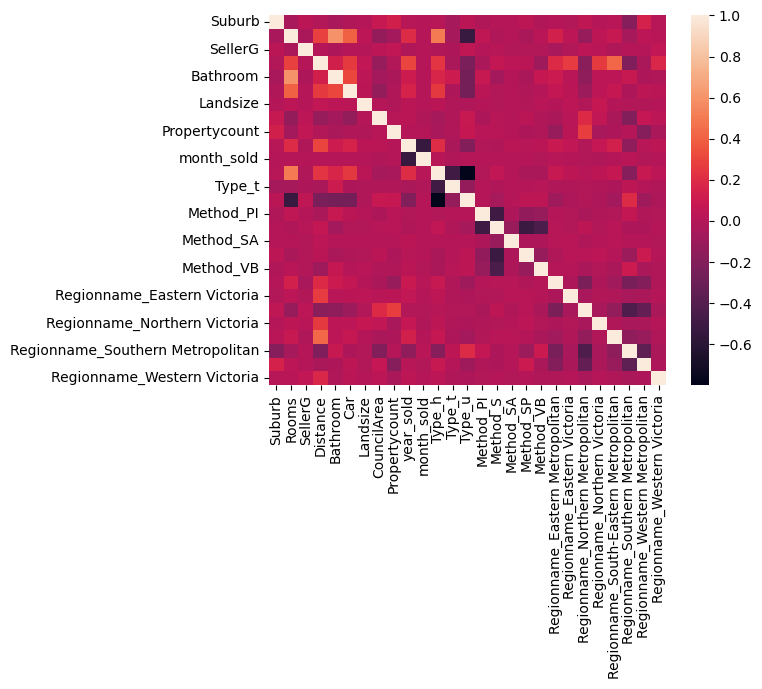

In [239]:
sns.heatmap(X.corr())

In [240]:
X_Cor = X.corr()
X_Cor.head(2)

,Suburb,Rooms,SellerG,Distance,Bathroom,Car,Landsize,CouncilArea,Propertycount,year_sold,...,Method_SP,Method_VB,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
Suburb,1.000000,-0.048042,0.028698,-0.006572,-0.048331,-0.021360,-0.000767,0.082530,0.129383,0.013677,...,0.041273,-0.024253,0.003082,-0.006738,0.050173,0.000130,0.021529,-0.189914,0.143195,0.014824
Rooms,-0.048042,1.000000,-0.041177,0.287560,0.597967,0.399537,0.032950,-0.126977,-0.065602,0.193442,...,-0.042511,0.016819,0.142144,0.034838,-0.121449,0.038234,0.082510,-0.060513,0.031698,0.018436


In [241]:
# We will create a loop to get a list of columns whose correlation with other columns is greater than .95
col_matrics = X_Cor.corr()
columns = X.columns
col_to_drop = []
for i in range(len(columns)):
    for j in range(i+1 , len(columns)):
  #      print(j , "  " , col_matrics.loc[columns[i], columns[j]])
        if col_matrics.loc[columns[i], columns[j]]> 0.95:
            col_to_drop.append(columns[j])
 #           print(j , " There is higher correlation  " , col_matrics.loc[columns[i], columns[j]])
col_to_drop=set(col_to_drop)
len(col_to_drop) 

0

In [242]:
X.shape
y.shape

(17667,)

### Adjusted R-Square to find Best Feature

In [243]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, accuracy_score

In [244]:
lr = LinearRegression()
X_Train, X_Test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0)
print(X_Test.shape)

(3534, 27)


###### Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]

In [245]:
col_list = X_Train.columns

In [246]:
n = 3534   #  Test Dataset Shape 
for col in range(1,len(col_list)+1):    
    Adj_R_Square_X_Train = X_Train.iloc[:, :col] 
    Adj_R_Square_X_Test= X_Test.iloc[:, :col]     
    lr_model = lr.fit(Adj_R_Square_X_Train, y_train)
    lr_model_pred = lr_model.predict(Adj_R_Square_X_Test)    
    r2_Square_Error = r2_score(y_test, lr_model_pred)
    #print('R-Square Value with Columns          : ', col , " : " , r2_Square_Error)    
    k = col
    Adj_R_Square =   (1-r2_Square_Error)*(n-1)/(n-k-1)
    Adj_R_Square = 1 - Adj_R_Square
    #Adj_R_Square = 1 -  [(1-r2_Square_Error)*(n-1)/(n-k-1)]
    print('Adjusted R Square Value with Columns : ' , col , " : " , Adj_R_Square)

Adjusted R Square Value with Columns :  1  :  0.0185326385569472
Adjusted R Square Value with Columns :  2  :  0.24536485497032723
Adjusted R Square Value with Columns :  3  :  0.24621425308051104
Adjusted R Square Value with Columns :  4  :  0.3790435771175169
Adjusted R Square Value with Columns :  5  :  0.4096936289320232
Adjusted R Square Value with Columns :  6  :  0.4117166343230748
Adjusted R Square Value with Columns :  7  :  0.41190568634261326
Adjusted R Square Value with Columns :  8  :  0.42218249419951726
Adjusted R Square Value with Columns :  9  :  0.4220218189325332
Adjusted R Square Value with Columns :  10  :  0.4234443972027885
Adjusted R Square Value with Columns :  11  :  0.4250987164391935
Adjusted R Square Value with Columns :  12  :  0.46833264622633597
Adjusted R Square Value with Columns :  13  :  0.46894209372355244
Adjusted R Square Value with Columns :  14  :  0.46879118212756765
Adjusted R Square Value with Columns :  15  :  0.469279714098665
Adjusted R Sq

### Exhaustive Feature Selection/ Best Feature Selection (Need to pip install mlextend)

In [247]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


##### Exhaustive feature selection for regression analysis

In [248]:
# For EFS we will reduce the records size
X_Train, X_Test, y_train, y_test = train_test_split(scaled_data,y,test_size=.9, random_state=0)
X_Train.shape

(1766, 27)

In [249]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X_Train = sc_x.fit_transform(X_Train)
X_Test = sc_x.transform(X_Test)

In [250]:
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
efs = EFS(lr,           
          scoring='neg_mean_squared_error',
          cv=2)
efs.fit(X_Train, y_train)

Features: 27/27

ExhaustiveFeatureSelector(cv=2, estimator=LinearRegression(),
                          feature_groups=[[0], [1], [2], [3], [4], [5], [6],
                                          [7], [8], [9], [10], [11], [12], [13],
                                          [14], [15], [16], [17], [18], [19],
                                          [20], [21], [22], [23], [24], [25],
                                          [26]],
                          scoring='neg_mean_squared_error')

In [251]:
print('Best MSE score: %.2f' % efs.best_score_ * (-1))
print('Best subset:', efs.best_idx_)
print('Best Feature Names:', efs.best_feature_names_)
print('Best MSE score: %.2f' % efs.best_score_ )
print('Selected features:', efs.best_idx_)



Best subset: (4,)
Best Feature Names: ('4',)
Best MSE score: -325784378816.41
Selected features: (4,)


In [252]:
efs.pre_dispatch


'2*n_jobs'

##### Forward Feature Selection Process

In [253]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression as lr
from time import time
LR = LinearRegression()
SFS_model = SFS(LR , forward = False, floating = False, cv = 2, scoring='neg_mean_squared_error' )
# scoring function for feature selection. The scoring function is used to assess the performance of each feature subset during the selection process.# Lets use the built in function in Python


In [257]:
SFS_model
sfs = SFS_model.fit(X_Train, y_train)
df_matrics = pd.DataFrame(sfs.get_metric_dict()).T
df_matrics.to_excel("SequentialFeatureSelector_Output.xlsx")

